# Лабораторная работа №5 (вариант №4)

##Задание

Анализ главных компонент (principal component analysis, РСА) — это популярный метод
уменьшения линейной размерности. Метод РСА проецирует наблюдения на главные
компоненты матрицы признаков (надо надеяться, на меньшее их количество), которые
сохраняют наибольшую дисперсию. РСА является неконтролируемым методом (без
учителя), т. е. он не использует информацию из вектора целей и вместо этого рассматривает
только матрицу признаков.

##Импорт библиотек

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [4]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [5]:
import mpl_toolkits.mplot3d
from sklearn import datasets
from sklearn.decomposition import PCA

In [6]:
import matplotlib.image as image

In [7]:
import plotly.express as px
import plotly.graph_objects as go

In [8]:
from google.colab import files
from google.colab import drive

In [9]:
# подключение диска

drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
path = "/content/drive/MyDrive/STUDY/магистратура курс 2/Нейронные сети/Lab_5/"

## Функции

In [11]:
# функция для построения графика объясненной дисперсии

def draw_explained_ratio(df, pca_param, colors):
  #X = df.drop('mental_health_history', axis=1)
  #y = df['mental_health_history']

  #X = df

  X = StandardScaler().fit_transform(df)

  pca = PCA(n_components=pca_param, whiten=True)
  X_pca = pca.fit_transform(X)

  features = range(pca.n_components_)
  explained_variance = np.cumsum(pca.explained_variance_ratio_)
  #print("explained_variance", explained_variance)

  plt.bar(
      features,
      explained_variance,
      alpha=0.5,
      align='center',
      label='Вклад признака в долю объясненной дисперсии',
      color = colors[0]
    )

  plt.step(
      features,
      explained_variance,
      where='mid',
      label='Кумулятивная объясненная дисперсия',
      color = colors[len(colors) - 1]
    )

  plt.ylabel('Доля объясненной дисперсии')
  plt.xlabel('Главные компоненты')
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()

##Пример программы

###Задача №1

Дан набор признаков, и требуется сократить количество признаков, сохраняя при этом
дисперсию данных. Использовать анализ главных компонент с помощью класса РСА
библиотеки scikit- leam.

####Решение

In [12]:
digits = datasets.load_digits()

Многие алгоритмы машинного обучения работают лучше, когда функции имеют
относительно одинаковый масштаб и близки к нормальному распределению.
MinMaxScaler, RobustScaler, StandardScaler, а также Normalizer являются методами
предварительной обработки данных для машинного обучения. Какой метод вам нужен,
если таковой имеется, зависит от типа вашей модели и ваших значений характеристик.

In [13]:
features = StandardScaler().fit_transform (digits.data)

Анализ главных компонент реализуется в библиотеке scikit-leam с использованием класса
РСА. Если требуется сократить наши признаки, одной из стратегий будет проецирование
всех наблюдений в двумерном пространстве на одномерную главную компоненту. Мы
потеряем информацию, собранную во второй главной компоненте, но в некоторых
ситуациях такой подход будет приемлемым компромиссом. Это и есть анализ главных
компонент (РСА).
У аргумента n components есть две операции в зависимости от заданного значения. Если
2
значение этого аргумента больше 1, то n components вернет указанное количество
признаков. Это приводит к вопросу выбора оптимального количества признаков. Если
значение аргумента n _ components находится между 0 и 1, то объект, созданный на основе
класса РСА, возвращает минимальное количество признаков, которые сохраняют указанную
дисперсию. Обычно используются значения 0.95 и 0.99, т. е. 95 и 99% дисперсии исходных
признаков будут сохранены.
Аргумент whiten=True преобразует значения каждой главной компоненты таким образом,
чтобы они имели нулевое среднее и единичную дисперсию. Еще одним аргументом
является svd_soiver="randomized", который реализует стохастический алгоритм
нахождения первых главных компонент, который, как правило, занимает значительно
меньше времени.

In [14]:
рса = PCA(n_components=0.99, whiten=True)

In [15]:
features_pca = рса.fit_transform(features)

In [16]:
print("Исходное количество признаков:", features.shape[1])
print("Сокращенное количество признаков:", features_pca.shape[1])

Исходное количество признаков: 64
Сокращенное количество признаков: 54


###Задача №2

Уменьшение количества признаков, когда данные линейно неразделимы. Вы подозреваете,
что ваши данные линейно неразделимы, и требуется сократить размерности. Применить
расширение анализа главных компонент, в котором используются ядра для нелинейного
уменьшения размерности.

####Решение

Метод анализа главных компонент (РСА) способен уменьшить размерность нашей матрицы
признаков (например, количество признаков). В стандартном методе РСА для уменьшения
количества признаков используется линейная проекция. Если данные линейно разделимы
(т. е. вы можете прочертить прямую или гиперплоскость между разными классами), то РСА
работает хорошо. Однако, если ваши данные не являются линейно разделимыми (например, вы можете разделить классы только с помощью изогнутой границы решения), линейное
преобразование работать не будет. В нашем решении для генерирования симулированного
набора данных с вектором целей из двух классов и двумя признаками мы использовали
функцию make circles библиотеки scikit-leam. Функция make _ circles создает линейно
неразделимые данные; в частности, один класс окружен со всех сторон другим классом.

In [17]:
features, _ = make_circles(n_samples=1000,
random_state=1,noise=0.1, factor=0.1)

Ядра позволяют проецировать линейно неразделимые данные в более высокую
размерность, где они линейно разделимы; этот подход называется ядерным трюком. Не
переживайте, если не понимаете детали ядерного трюка; просто представьте ядра как
разные способы проецирования данных. В объекте, созданном из класса KernelPCA
библиотеки scikit-leam можно использовать несколько ядер, задаваемых с помощью
параметра kernel. Широко используемым ядром является гауссово радиально-базисное
функциональное ядро rbf, но есть и другие варианты — полиномиальное ядро (poly) и
сигмоидное ядро (sigmoid). Мы даже можем указать линейную проекцию (linear), которая
даст те же результаты, что и стандартный метод РСА.
Одним из недостатков ядерного метода РСА является то, что мы должны указать ряд
параметров. Например, в задаче 1 мы задаем n_components равным 0.99, чтобы РСА отбирал
количество компонент с сохранением 99% дисперсии. Такая возможность в ядерном методе
РСА отсутствует. Вместо этого мы должны задать ряд параметров (например,
n_components=1). Более того, ядра сопровождаются своими гиперпараметрами, которые
нам придется устанавливать; например, радиально-базисная функция требует значения
gamma.

In [18]:
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

In [19]:
print("Исходное количество признаков:", features.shape[1])
print ("Сокращенное количество признаков:",
features_kpca.shape[1])

Исходное количество признаков: 2
Сокращенное количество признаков: 1


###Задача №3

Визуализация PCA на примере набора данных Iris. Этот набор данных состоит из лепестков
и чашелистиков 3 различных типов ирисов (Setosa, Versicolour и Virginica), хранящихся в
массиве размером 150x4. Строки представляют собой образцы, а столбцы: длина
чашелистика, ширина чашелистика, длина лепестка и ширина лепестка.

ПОЧЕМУ PCA?
Когда есть много входных атрибутов, трудно визуализировать данные. В области
машинного обучения есть очень известный термин «проклятие размерности». По сути, это
относится к тому факту, что большее количество атрибутов в наборе данных отрицательно
влияет на точность и время обучения модели машинного обучения. Анализ главных
компонентов (PCA) - это способ решения этой проблемы, который используется для
лучшей визуализации данных и повышения точности.

Как работает PCA?
PCA - это неконтролируемая задача предварительной обработки, которая выполняется
перед применением любого алгоритма машинного обучения. PCA основан на
«ортогональном линейном преобразовании», который представляет собой математический
метод для проецирования атрибутов набора данных в новую систему координат. Атрибут,
который описывает наибольшее отклонение, называется первым главным компонентом и
помещается в первую координату. Точно так же атрибут, который стоит вторым при
описании дисперсии, называется вторым главным компонентом и так далее. Короче говоря,
полный набор данных можно выразить в терминах основных компонентов. Обычно более
90% дисперсии объясняется двумя / тремя основными компонентами. Таким образом,
анализ главных компонентов, или PCA, преобразует данные из пространства большой
размерности в пространство низкой размерности, выбирая наиболее важные атрибуты,
которые захватывают максимум информации о наборе данных.

In [20]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features.
y = iris.target
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
plt.figure(2, figsize=(8, 6))
plt.clf()

<Figure size 800x600 with 0 Axes>

([], [])

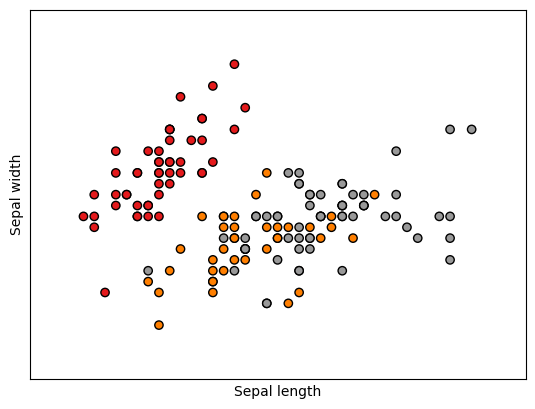

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

<ipython-input-22-3271f8ca4811>:15: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-22-3271f8ca4811>:17: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-22-3271f8ca4811>:19: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


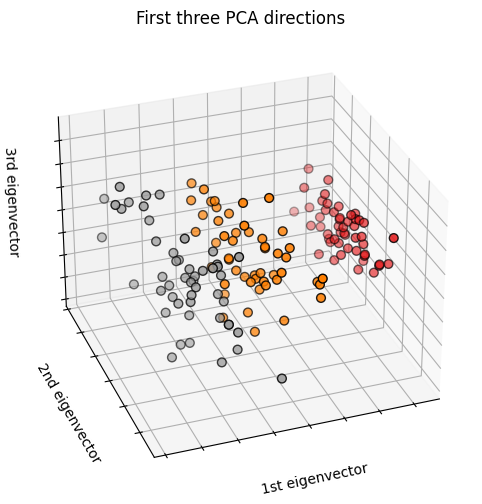

In [22]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
X_reduced[:, 0],
X_reduced[:, 1],
X_reduced[:, 2],
c=y,
cmap=plt.cm.Set1,
edgecolor="k",
s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

##Задание по вариантам

In [23]:
palette = 'viridis'

colors = sns.color_palette(palette).as_hex()[:]

###Задача №1 + Задача №3

https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis

####Сокращение набора признаков с сохранением дисперсии

Загружаем датасет во фрейм данных.

In [24]:
df = pd.read_csv(path + 'StressLevelDataset.csv')
df.head()

anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2                     3           2   
1                  1  ...            2                     1           4   
2                  2  ...            2                     2           3   
3                  2  ...            2                     2           4   
4                  2  ...            3                     4           3   

   teacher_student_relationship  future_career_concerns  social_support  \
0                             3                       3               2   
1                             1                       5               1   
2                             3                       2               2   
3                             1                       4               1   
4                             1                       2               1   

   peer_pressure  extracurricular_activities  bullying  stress_level  
0              3                           3         2             1  
1              4                           5         5             2  
2              3                           2         2             1  
3              4                           4         5             2  
4              5                           0         5             1  

[5 rows x 21 columns]

Просматриваем информацию о датасете. Все признаки являются числовыми, поэтому нам не нужно кодировать категориальные переменные.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

Построим графики распределения признаков с помощью boxenplot.

Приведенный ниже график показывает диапазон значений признаков. Все объекты находятся в разных диапазонах, поэтому необходимо их стандартизировать.

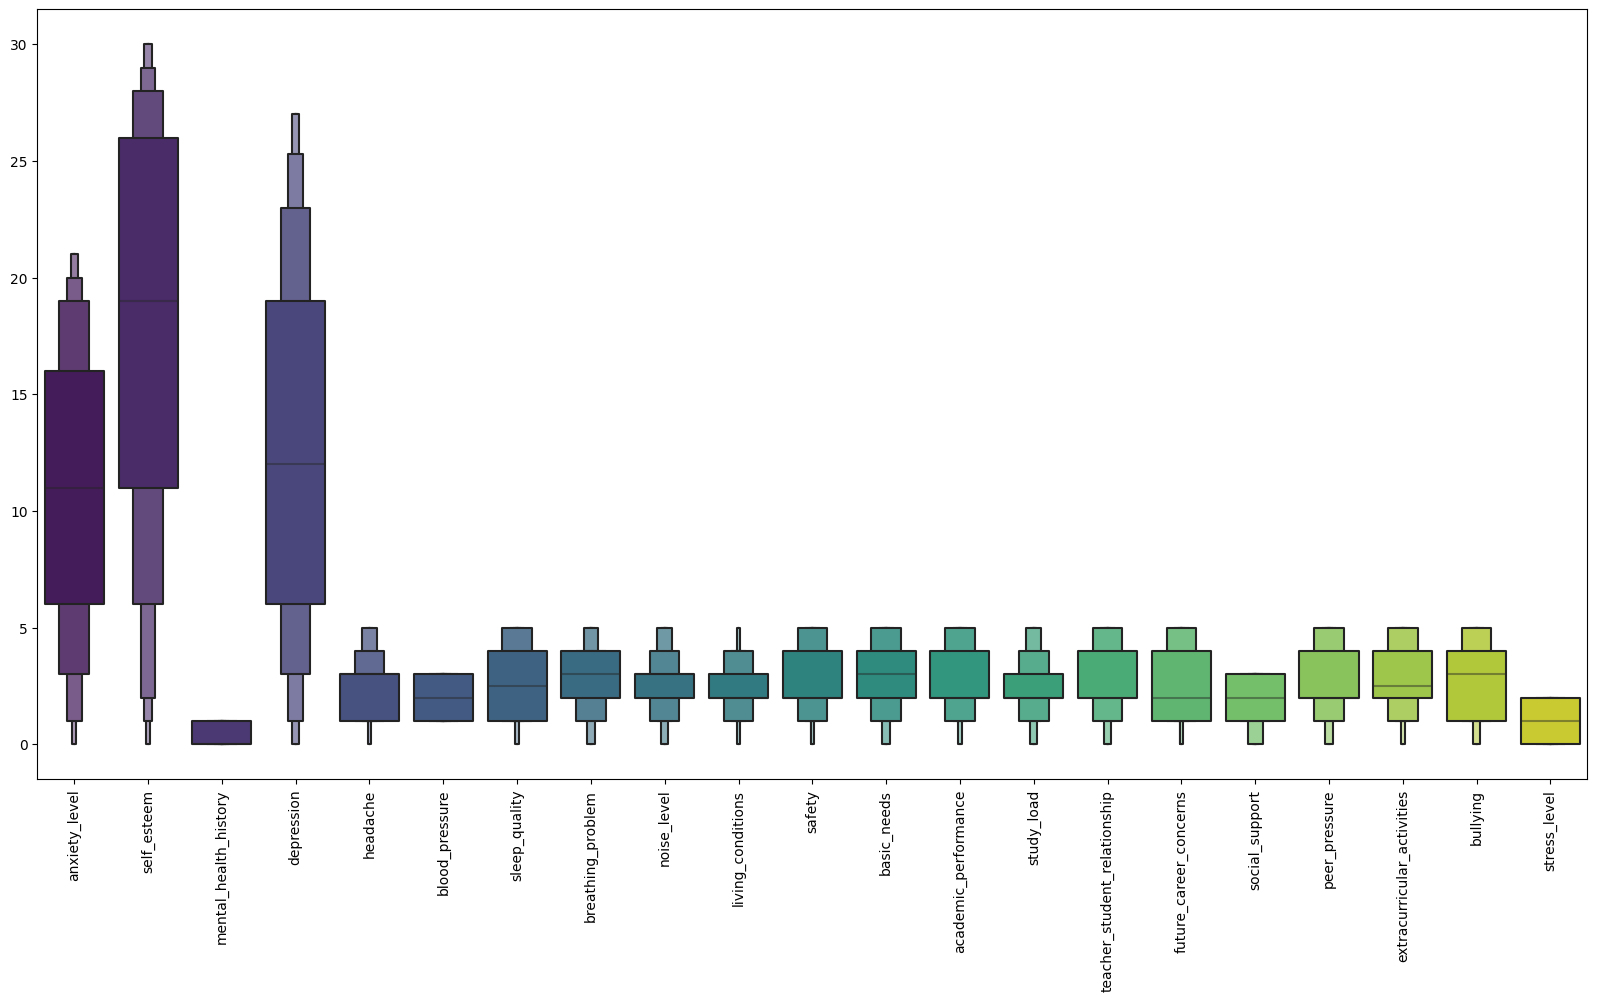

In [26]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = df,palette = palette)
plt.xticks(rotation=90)
plt.show()

Прежде чем приступить к вычислению главных компонент, важно стандартизировать данные, приводя их к нулевому среднему и единичной дисперсии. Это важно, потому что признаки с разными масштабами могут исказить результаты PCA.

In [27]:
features = StandardScaler().fit_transform(df)

Построим график распредения значений признаков после стандартизации.

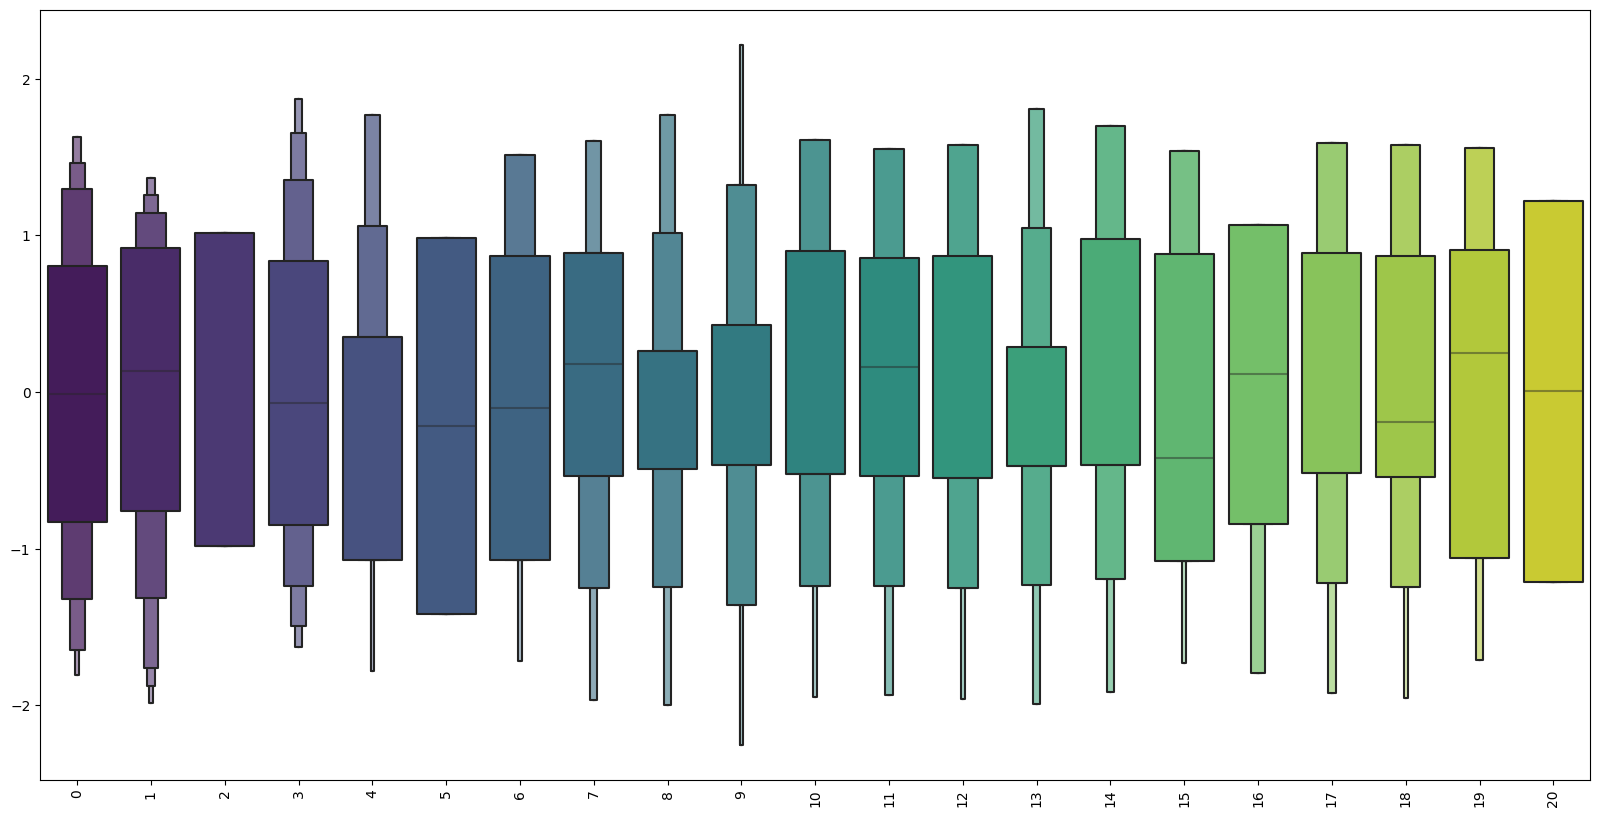

In [28]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = palette)
plt.xticks(rotation=90)
plt.show()

Создадим объект PCA, в качестве параметра указав 99% дисперсии, которую нужно сохранить.


In [29]:
рса = PCA(n_components=0.99, whiten=True)

Объект, созданный на основе класса РСА, возвращает минимальное количество признаков, которые сохраняют указанную дисперсию.

In [30]:
features_pca = рса.fit_transform(features)

In [31]:
print("Исходное количество признаков:", features.shape[1])
print("Сокращенное количество признаков:", features_pca.shape[1])

Исходное количество признаков: 21
Сокращенное количество признаков: 20


Построим график объясненной дисперсии.

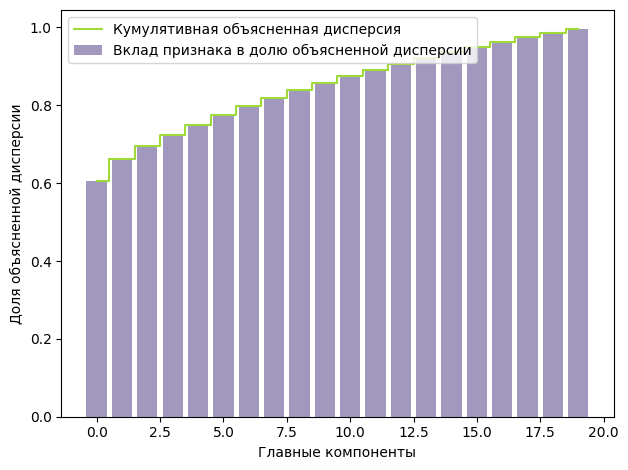

In [32]:
draw_explained_ratio(df, 0.99, colors)

Теперь укажем значени n компонент и выполним сокращение признаков.

In [33]:
рса_obj = PCA(n_components=4)
features_pca = рса_obj.fit_transform(features)

Выведем долю объясненной дисперсии для данного количества признаков.

In [34]:
explained_variance = np.cumsum(рса_obj.explained_variance_ratio_)

print("Доля объясненной дисперсии:", round(np.max(explained_variance),2))

Доля объясненной дисперсии: 0.72


Построим график объясненной дисперсии.

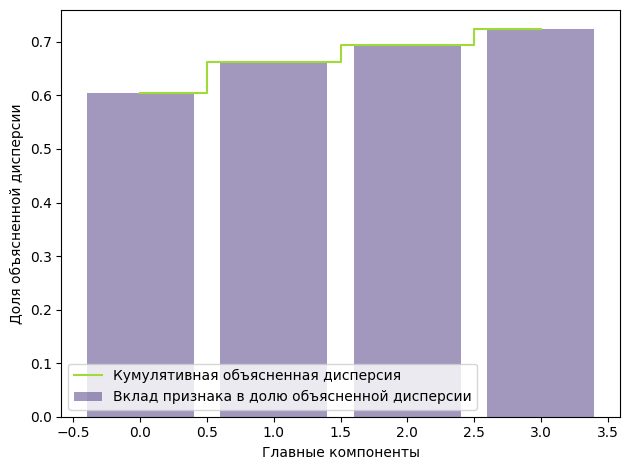

In [35]:
draw_explained_ratio(df, 4, colors)

####Визуализация PCA на примере набора данных

Дан набор признаков, и требуется сократить количество признаков, сохраняя при этом дисперсию данных. Использовать анализ главных компонент с помощью класса РСА библиотеки scikit- leam.

Выведем список столбцов датасета.

In [36]:
list(df.columns)

['anxiety_level',
 'self_esteem',
 'mental_health_history',
 'depression',
 'headache',
 'blood_pressure',
 'sleep_quality',
 'breathing_problem',
 'noise_level',
 'living_conditions',
 'safety',
 'basic_needs',
 'academic_performance',
 'study_load',
 'teacher_student_relationship',
 'future_career_concerns',
 'social_support',
 'peer_pressure',
 'extracurricular_activities',
 'bullying',
 'stress_level']

Выведем дисперсию для каждого признака.

Как видно из списка, наибольшей дисперсией обладают признаки self_esteem и depression. Выберем их для визуализации.

In [37]:
variances = df.var()

print(variances.sort_values(ascending=False))

self_esteem                     80.005852
depression                      59.706658
anxiety_level                   37.424518
sleep_quality                    2.397489
bullying                         2.343832
future_career_concerns           2.338989
basic_needs                      2.055670
peer_pressure                    2.031381
extracurricular_activities       2.009483
academic_performance             2.001075
headache                         1.986284
safety                           1.977317
breathing_problem                1.961998
teacher_student_relationship     1.917058
noise_level                      1.763921
study_load                       1.731280
living_conditions                1.252626
social_support                   1.097940
blood_pressure                   0.694847
stress_level                     0.675146
mental_health_history            0.250175
dtype: float64


In [38]:
# нахождение и сортировка признаков
# по степени корреляции

df_corr = df.corr()

N = 20

mental_health_corr = df_corr['mental_health_history']

max_corrs = mental_health_corr.sort_values(key=lambda x: abs(x.astype(int)), ascending = False)[:N]
print(max_corrs)

mental_health_history           1.000000
anxiety_level                   0.634450
basic_needs                    -0.601196
bullying                        0.624366
extracurricular_activities      0.554576
peer_pressure                   0.580602
social_support                 -0.482560
future_career_concerns          0.625909
teacher_student_relationship   -0.587728
study_load                      0.532267
academic_performance           -0.586193
safety                         -0.546731
self_esteem                    -0.603502
living_conditions              -0.508525
noise_level                     0.515290
breathing_problem               0.464347
sleep_quality                  -0.614146
blood_pressure                  0.295617
headache                        0.604826
depression                      0.615882
Name: mental_health_history, dtype: float64


Запишем целевую переменную в отдельный фрейм.

In [39]:
y = df['mental_health_history']

Построим диаграмму рассеяния для выбранных признаков.

In [40]:
X = df.drop('mental_health_history', axis=1)

X = df.loc[:, ['self_esteem', 'depression']]

x_min, x_max = X.loc[:, ['self_esteem']].min() - 0.5, X.loc[:, ['self_esteem']].max() + 0.5
y_min, y_max = X.loc[:, ['depression']].min() - 0.5, X.loc[:, ['depression']].max() + 0.5

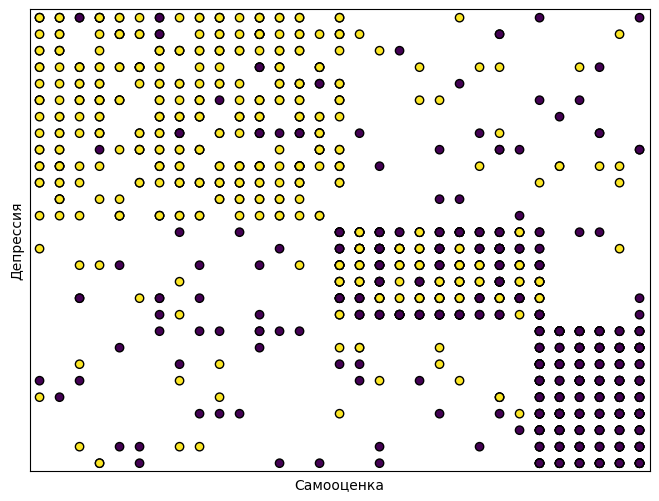

In [41]:
plt.figure(num = 2, figsize=(8, 6))

plt.scatter(X.loc[:, ['self_esteem']], X.loc[:, ['depression']], c=y, cmap=palette, edgecolor="k")

plt.xlabel("Самооценка")
plt.ylabel("Депрессия")
plt.xlim(x_min.values, x_max.values)
plt.ylim(y_min.values, y_max.values)
plt.xticks(())
plt.yticks(())

plt.show()

Как видим, точки на графике действительно имеют очень сильный разброс.

Выполним сокращение пространства признаков, установив количество признаков равное трём.

In [42]:
X_reduced = PCA(n_components=3).fit_transform(df)

In [43]:
fig = go.Figure(data =[go.Scatter3d(x = X_reduced[:, 0],
                                   y = X_reduced[:, 1],
                                   z = X_reduced[:, 2],
                                   mode ='markers',
                                   marker = dict(
                                     size = 4,
                                     color = y,
                                     colorscale ='Viridis',
                                     opacity = 0.8
                                   )
)])

fig.show()

###Задача №2

Уменьшение количества признаков, когда данные линейно неразделимы. Вы подозреваете,
что ваши данные линейно неразделимы, и требуется сократить размерности. Применить
расширение анализа главных компонент, в котором используются ядра для нелинейного
уменьшения размерности.

Kernel PCA — это расширение PCA , которое позволяет разделять нелинейные данные с помощью ядер. Основная идея заключается в том, чтобы проецировать линейно неразделимые данные в пространство более высокого измерения, где они становятся линейно разделимыми.

In [44]:
from sklearn.datasets import make_moons

Создадим датасет make_moons из библиотеки sklearn.

make_moons является "игрушечным" набором данных для визуализации алгоритмов кластеризации и классификации.Строит два чередующихся полукруга.



In [45]:
sample_size = 1000

In [46]:
features, y = make_moons(n_samples=sample_size, noise=0.05)

Выполним уменьшение размерности с помощью kernel PCA.

В sklearn существует несколько видов ядер - 'линейное', 'полиномиальное', 'гауссово', 'сигмовидная', 'косинус'.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

Создадим объекты PCA с параметрами по умолчанию и выведем получившиеся графики преобразования.

In [47]:
emb = np.empty((5, sample_size, 2))

emb[0] = KernelPCA(n_components=2, kernel='linear').fit_transform(features)
emb[1] = KernelPCA(n_components=2, kernel='poly').fit_transform(features)
emb[2] = KernelPCA(n_components=2, kernel='rbf').fit_transform(features)
emb[3] = KernelPCA(n_components=2, kernel='sigmoid').fit_transform(features)
emb[4] = KernelPCA(n_components=2, kernel='cosine').fit_transform(features)

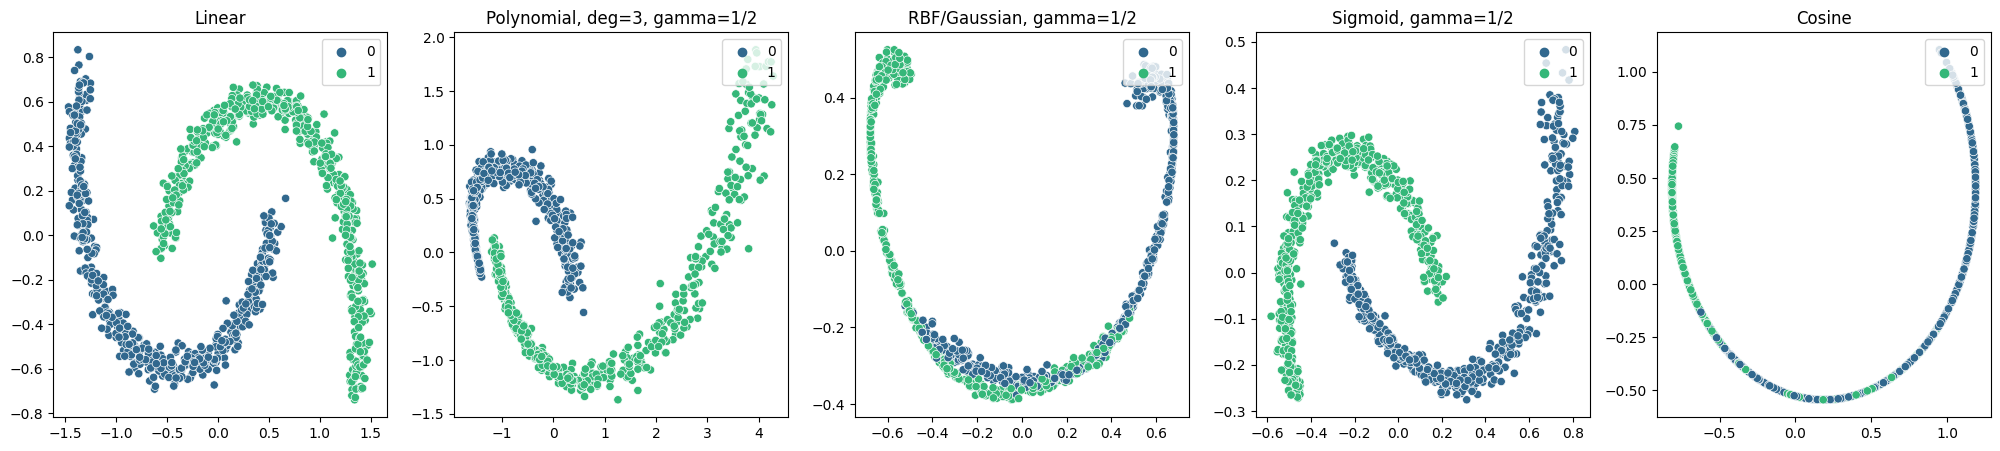

In [48]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# параметры по умолчанию в sklearn
desc = ['Linear','Polynomial, deg=3, gamma=1/2', 'RBF/Gaussian, gamma=1/2', 'Sigmoid, gamma=1/2', 'Cosine']

for i in range(0, 5):
  sns.scatterplot(x=emb[i,:,0], y=emb[i,:,1], hue=y, ax=axes[i], palette = palette)
  axes[i].set_title(desc[i])
  axes[i].legend(loc='upper right')

plt.show()

И с параметрами, выстроенными вручную.

Выбор параметров зависит от набора данных и может быть получен с помощью методов настройки гиперпараметров, таких как Grid Search.

In [69]:
emb = np.empty((5, sample_size, 2))

emb[0] = KernelPCA(n_components=2, kernel='linear').fit_transform(features)
emb[1] = KernelPCA(n_components=2, kernel='poly', degree = 5, gamma = 7).fit_transform(features)
emb[2] = KernelPCA(n_components=2, kernel='rbf', gamma = 15).fit_transform(features)
emb[3] = KernelPCA(n_components=2, kernel='sigmoid', coef0 = 3, gamma = 1).fit_transform(features)
emb[4] = KernelPCA(n_components=2, kernel='cosine').fit_transform(features)

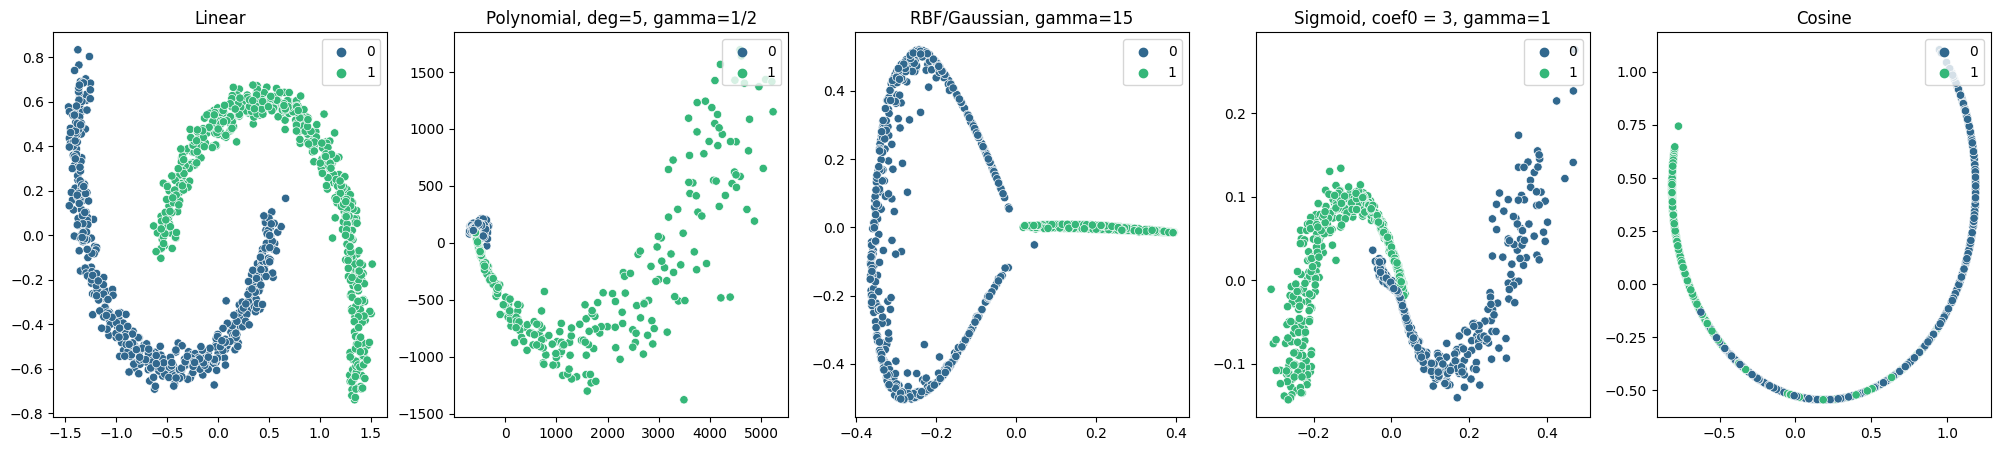

In [70]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# параметры по умолчанию в sklearn
desc = ['Linear','Polynomial, deg=5, gamma=7', 'RBF/Gaussian, gamma=15', 'Sigmoid, coef0 = 3, gamma=1', 'Cosine']

for i in range(0, 5):
  sns.scatterplot(x=emb[i,:,0], y=emb[i,:,1], hue=y, ax=axes[i], palette = palette)
  axes[i].set_title(desc[i])
  axes[i].legend(loc='upper right')

plt.show()

###Задача №4

Сжатие изображений с помощью PCA.

####Пример №1

Выведем изображение, используя matplotlib.

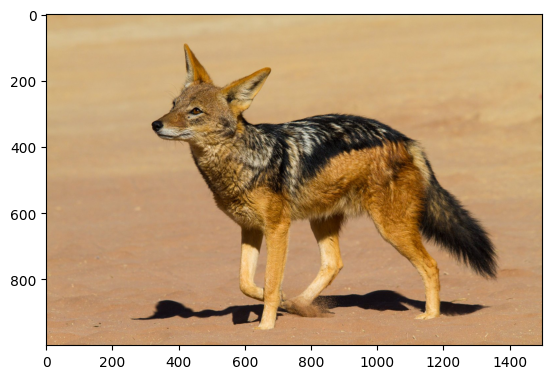

In [ ]:
img = image.imread(path + 'jackal.jpg')
plt.imshow(img)

Произведем сжатие изображения без потери качества. Для этого сожмем изображение с помощью PCA и визуально сравним получившееся изображение с исходным.

Сохраним исходные размеры и изменим размер изображения.

In [ ]:
orig_shape = img.shape
orig_shape

(1000, 1499, 3)

In [ ]:
pca_img = img.reshape(orig_shape[0], -1)

Создадим объект PCA, установим долю дисперсии равной 0.99.

In [ ]:
img_pca = PCA(n_components=0.99)
scaler = StandardScaler().fit(pca_img)
x = scaler.transform(pca_img)

Выведем график объясненной дисперсии для заданного порога.

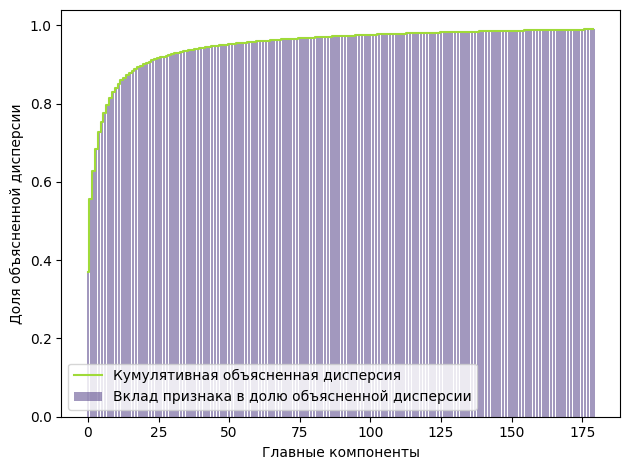

In [ ]:
draw_explained_ratio(pca_img, 0.99, colors)

Сожмем изображение и вывыдем исходное и сокращенное количество признаков.

In [ ]:
img_pca = img_pca.fit(x)
compresed_img = img_pca.transform(x)

In [ ]:
print("Исходное количество признаков:", x.shape[1])
print("Сокращенное количество признаков:", compresed_img.shape[1])

Исходное количество признаков: 4497
Сокращенное количество признаков: 180


Произведем обратное преобразование изображения.

In [ ]:
compresed_img = img_pca.inverse_transform(compresed_img)
compresed_img = scaler.inverse_transform(compresed_img)
compresed_img = compresed_img.reshape(orig_shape).astype(int)

Выведем изображения.

Визуально разница практически неразличима.

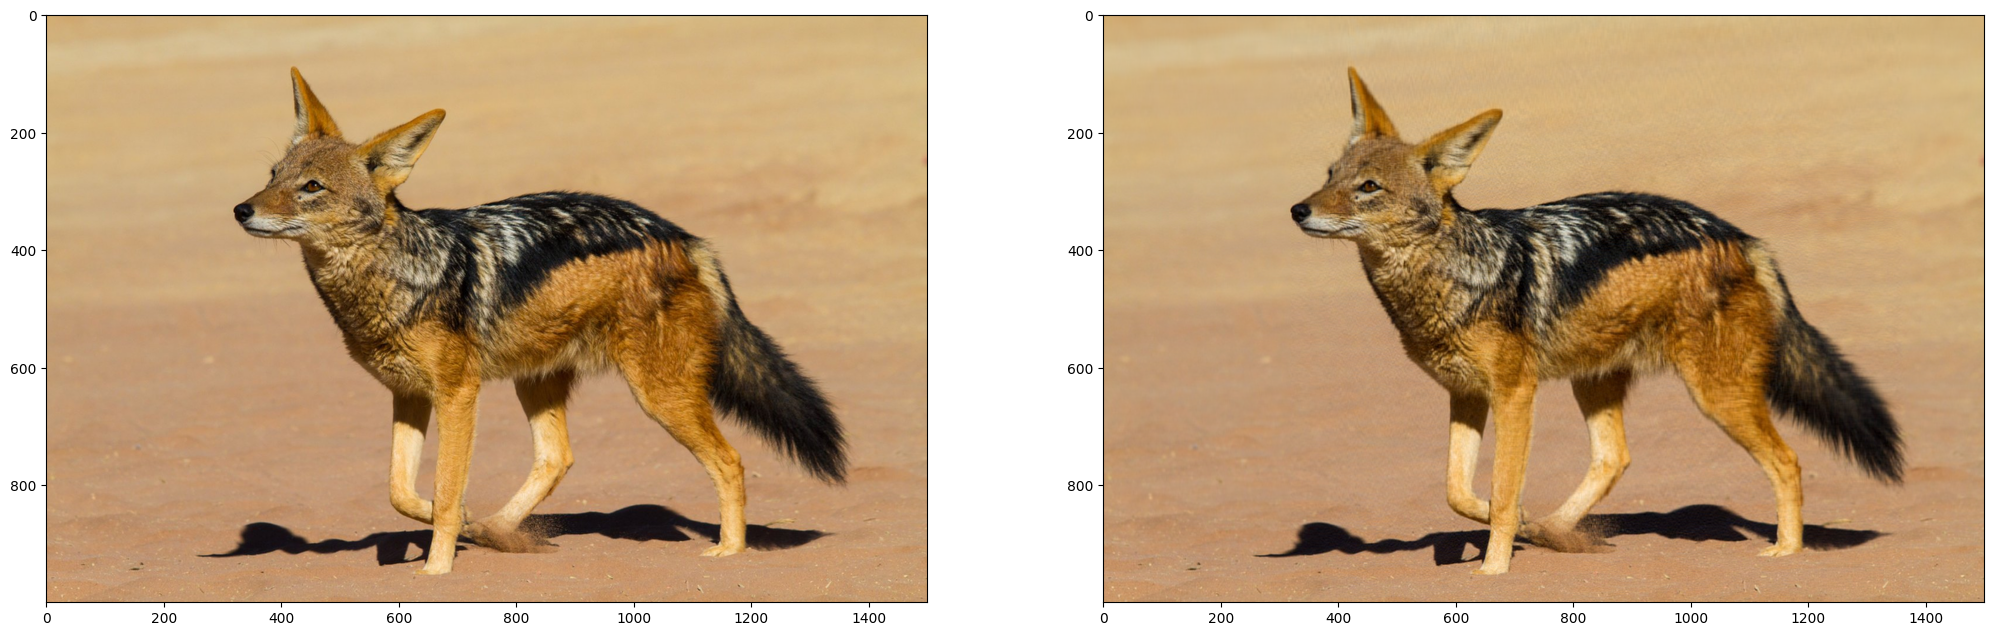

In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(25, 15))

axarr[0].imshow(img)
axarr[1].imshow(compresed_img)

plt.show()

Построим несколько изображений для разного количества признаков.

In [ ]:
# функция сжатия изображения

def compress_image(n_components, pca_img):
  img_pca = PCA(n_components=n)
  scaler = StandardScaler().fit(pca_img)
  x = scaler.transform(pca_img)
  img_pca = img_pca.fit(x)

  compresed_img = img_pca.transform(x)
  compresed_img = img_pca.inverse_transform(compresed_img)
  compresed_img = scaler.inverse_transform(compresed_img)
  compresed_img = compresed_img.reshape(orig_shape)
  compresed_img = np.clip(compresed_img.astype(int), 0, 255)

  return compresed_img

In [ ]:
for n in [5, 10, 20, 30, 40, 50, 100, 200, 300]:

  compresed_img = compress_image(n, pca_img)

  plt.imshow(compresed_img)
  plt.title(f"Изображение для {n} компонент")
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

После 200 компонент различия почти не видны.

####Пример №2

Возьмем изображение с большим количеством мелких деталей, например, сложное архитектурное сооружение и проделаем аналогичные действия.

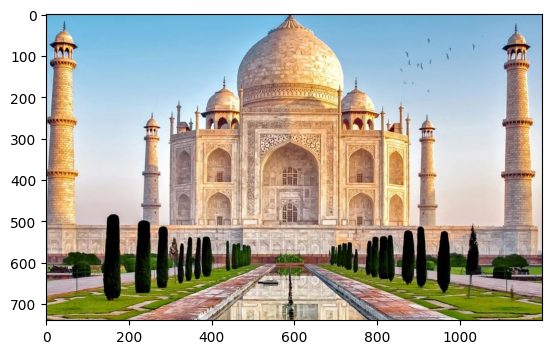

In [ ]:
img = image.imread(path + 'Taj-Mahal.jpg')
plt.imshow(img)

In [ ]:
orig_shape = img.shape
orig_shape

(740, 1200, 3)

In [ ]:
pca_img = img.reshape(orig_shape[0], -1)

In [ ]:
img_pca = PCA(n_components=0.99)
scaler = StandardScaler().fit(pca_img)
x = scaler.transform(pca_img)

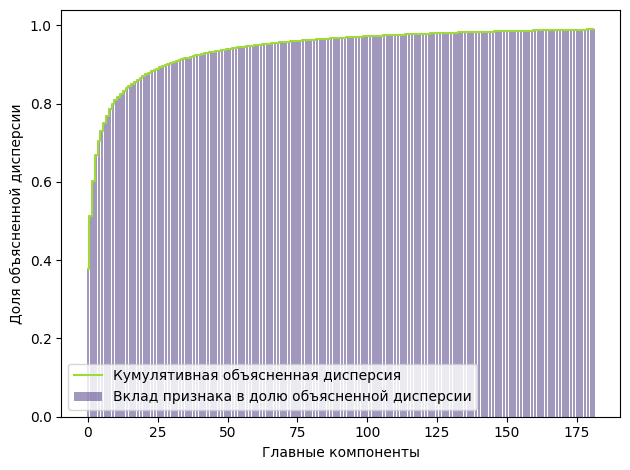

In [ ]:
draw_explained_ratio(pca_img, 0.99, colors)

In [ ]:
img_pca = img_pca.fit(x)
compresed_img = img_pca.transform(x)

In [ ]:
print("Исходное количество признаков:", x.shape[1])
print("Сокращенное количество признаков:", compresed_img.shape[1])

Исходное количество признаков: 3600
Сокращенное количество признаков: 182


In [ ]:
compresed_img = img_pca.inverse_transform(compresed_img)
compresed_img = scaler.inverse_transform(compresed_img)
compresed_img = compresed_img.reshape(orig_shape).astype(int)

Сравним изображения.

In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(25, 15))

axarr[0].imshow(img)
axarr[1].imshow(compresed_img)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

На втором изображении видно слабую зернистость неба, но для такого значительного сокращения признаков изображение выглядит достойно.

In [ ]:
for n in [5, 10, 20, 30, 40, 50, 100, 200, 300]:

  compresed_img = compress_image(n, pca_img)

  plt.imshow(compresed_img)
  plt.title(f"Изображение для {n} компонент")
  plt.show()

Output hidden; open in https://colab.research.google.com to view.